# Laboratorio 01

Universidad del Valle de Guatemala, Visión por Computadora, 2025
Realizado por Diego Morales, Angel Castellanos, Alejandro Azurdia


In [9]:
import numpy as np

import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image

from sklearn.cluster import k_means

## 1. Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

Mostrar a través de ejemplos la imagen original y la imagen ecualizada. Mostrar también los histogramas normalizados y su distribución acumulada de ambas imágenes. Comparar los resultados de su función contra alguna función ya predefinida en Python para calcular ecualizaciones. Por ejemplo, en scikit-image, tenemos la función skimage.exposure.equalize hist; o en OpenCV, tenemos la función cv2.equalizeHist. ¿Son iguales sus resultados con los de la función de Python? Explique por qué son iguales o explique por qué hay diferencias.

Version con SKimage

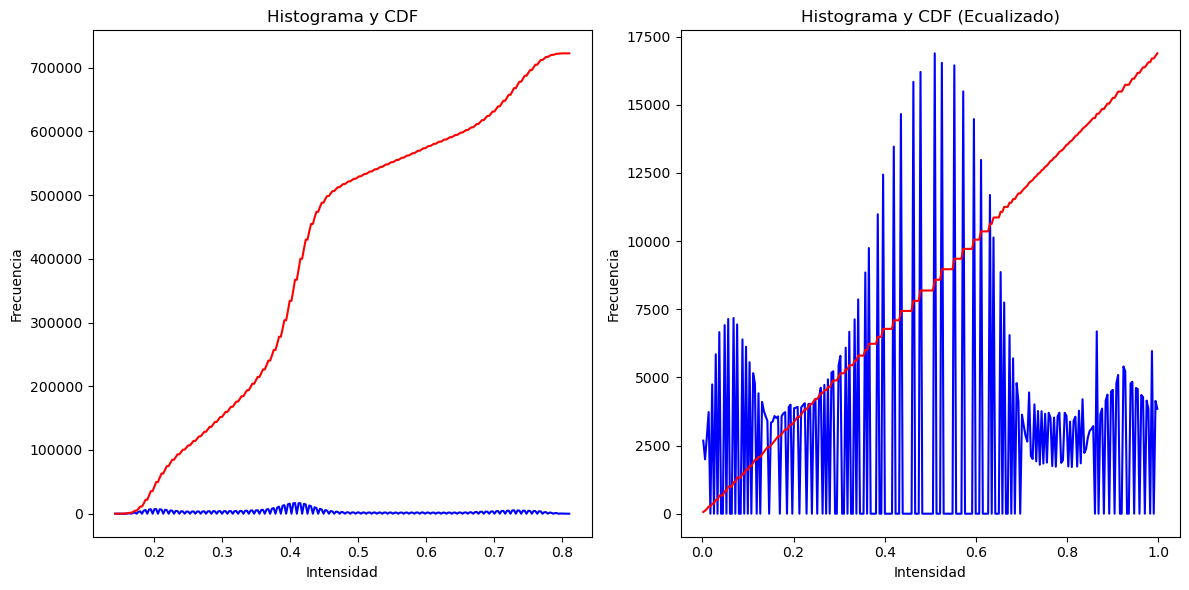

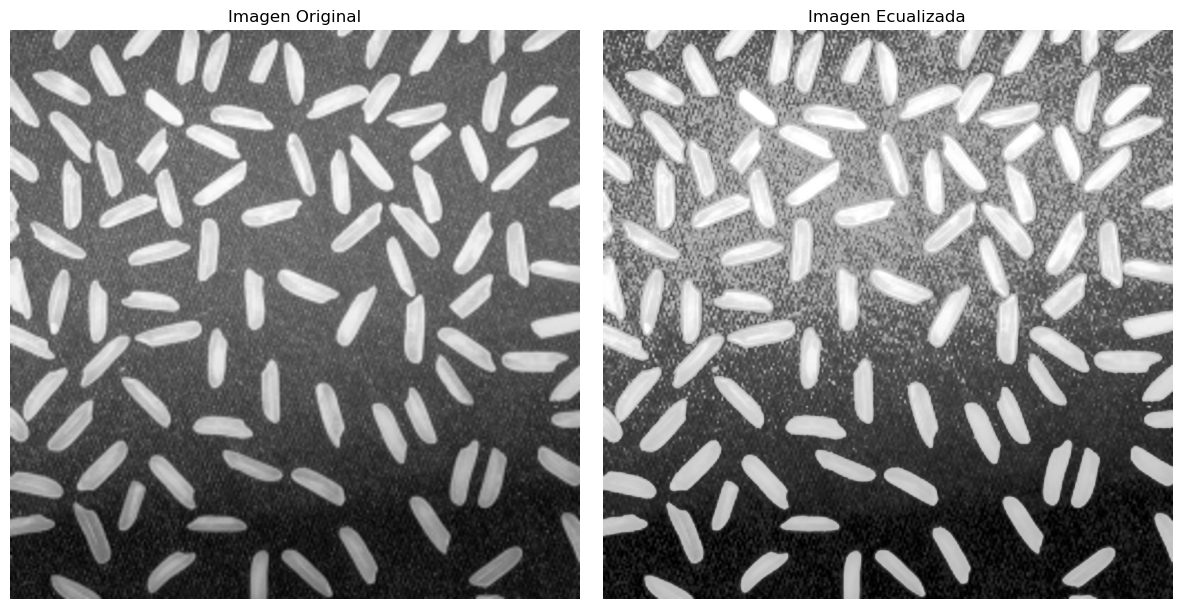

In [26]:
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float, io

# Cargar una imagen de ejemplo
image = img_as_float(io.imread("img/rice.jpg", as_gray=True))

# Calcular el histograma y la CDF usando skimage
hist, hist_centers = exposure.histogram(image)
cdf = hist.cumsum()

# Mostrar el histograma y la CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_centers, hist, color='blue')
plt.plot(hist_centers, cdf, color='red')
plt.title('Histograma y CDF')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

# Ecualización del histograma
image_eq = exposure.equalize_hist(image)

# Calcular el histograma y la CDF de la imagen ecualizada usando skimage
hist_eq, hist_centers_eq = exposure.histogram(image_eq)
cdf_eq = hist_eq.cumsum()
cdf = cdf_eq * hist_eq.max() / cdf_eq.max()

# Mostrar el histograma y la CDF de la imagen ecualizada
plt.subplot(1, 2, 2)
plt.plot(hist_centers_eq, hist_eq, color='blue')
plt.plot(hist_centers_eq, cdf, color='red')
plt.title('Histograma y CDF (Ecualizado)')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_eq, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

plt.tight_layout()
plt.show()

Version manual

In [ ]:
# Cargar una imagen en escala de grises

img = Image.open("img/rice.jpg").convert("L")

# Calcular el histograma y la CDF usando np.histogram

hist, bins = np.histogram(img, bins=256, range=(0, 256))
cdf = hist.cumsum()
